In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE =224
BATCH_SIZE =32
CHANNELS=3
EPOCHS=25

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [44]:
len(dataset)

68

(32, 224, 224, 3)
[0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 2 0 0 0 1 0 1 0 0 1 1 0 0 0 2 0]
[[[163.40817 161.4796  182.25511]
  [151.69388 149.96428 170.01021]
  [162.46939 161.46939 178.61224]
  ...
  [122.02539 119.02539 130.02539]
  [113.5816  110.5816  121.5816 ]
  [115.67353 112.67353 123.67353]]

 [[158.26021 157.47449 174.04591]
  [154.20409 153.41837 168.13264]
  [168.9847  168.19899 182.35204]
  ...
  [120.60207 117.60207 128.60207]
  [120.5051  117.5051  128.5051 ]
  [117.16321 114.16321 125.16321]]

 [[163.54082 163.89796 173.30612]
  [148.25    148.60715 156.82143]
  [159.59694 159.95409 168.16837]
  ...
  [122.81131 119.81131 130.81131]
  [126.70919 123.70919 134.7092 ]
  [120.89784 117.89784 128.89784]]

 ...

 [[188.88272 186.88272 191.88272]
  [189.29086 187.29086 192.29086]
  [190.05617 188.05617 193.05617]
  ...
  [150.92345 145.92345 151.92345]
  [153.31136 148.31136 154.31136]
  [165.83708 160.83708 166.83708]]

 [[185.6122  183.6122  188.6122 ]
  [187.57649 185.57649 190.5

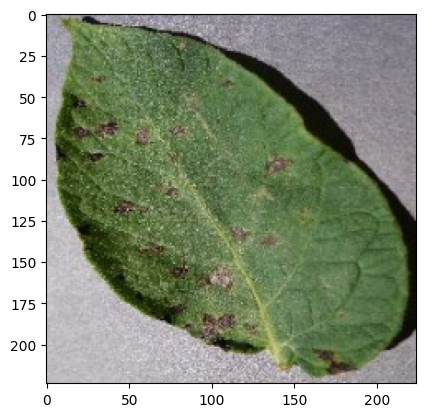

In [5]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].numpy())
    print(image_batch[0])
    plt.imshow(image_batch[0].numpy().astype("uint8"))

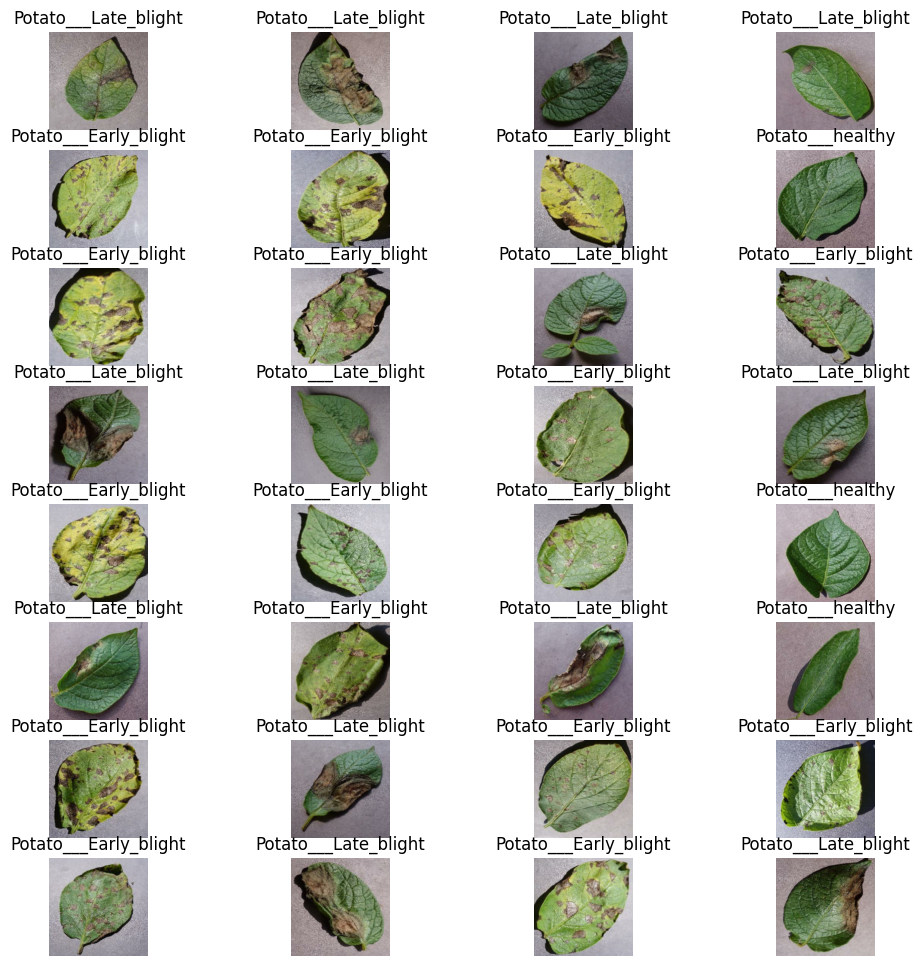

In [46]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):
    for i in range(32):
        ax= plt.subplot(8,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


    

In [47]:
len(dataset)

68

In [6]:
def get_dataset_split(ds, train=0.8, val=0.1, test=0.1, shuffle=True, shuffle_size=1000):

    ds_size =len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_s=int(train*ds_size)   
    test_s=int(test*ds_size)
    val_s=int(val*ds_size) 

    train_ds=ds.take(train_s)
    val_ds=ds.skip(train_s).take(val_s)
    test_ds=ds.skip(train_s).skip(val_s).take(test_s)
    return train_ds ,val_ds, test_ds

In [80]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define your dataset directory
# dataset_dir = "path/to/your/dataset"

# Load your dataset
# dataset = image_dataset_from_directory(dataset_dir, image_size=(224, 224), batch_size=32)

# Split the dataset
train_ds, val_ds, test_ds = get_dataset_split(dataset)

# Load the ResNet50 model with pre-trained weights and include_top=True
base_model = ResNet50(weights='imagenet', include_top=True)

# Compile the model
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Evaluate the base model on the test set
initial_accuracy = base_model.evaluate(test_ds)
print(f"Initial accuracy: {initial_accuracy}")

# Modify the model
# Remove the original softmax layer


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.0000e+00 - loss: 11.6990
Initial accuracy: [11.631065368652344, 0.0]


In [ ]:
base_model.layers.pop()

# Add a new softmax layer
x = base_model.output
x = layers.Dense(3, activation='softmax')(x)  # Change 10 to the number of classes in your dataset

# Create the new model
new_model = models.Model(inputs=base_model.input, outputs=x)

# Compile the new model
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the new model
new_model.fit(train_ds, validation_data=val_ds, epochs=10)

# Evaluate the new model on the test set
new_accuracy = new_model.evaluate(test_ds)
print(f"New accuracy: {new_accuracy}")


In [7]:
train , val, test = get_dataset_split(dataset)

In [8]:
train=train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val=val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [9]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)  # 0.2 is a common value for small rotations; adjust as needed
])

In [81]:
base_model.layers.pop()

# Add a new softmax layer
x = base_model.output
x = layers.Dense(3, activation='softmax')(x)  # Change 10 to the number of classes in your dataset

# Create the new model
new_model = models.Model(inputs=base_model.input, outputs=x)

# Compile the new model
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the new model
new_model.fit(train_ds, validation_data=val_ds, epochs=10)

# Evaluate the new model on the test set
new_accuracy = new_model.evaluate(test_ds)
print(f"New accuracy: {new_accuracy}")


Epoch 1/10
 6/54 ━━━━━━━━━━━━━━━━━━━━ 24:11 30s/step - accuracy: 0.6240 - loss: 1.0784

KeyboardInterrupt: 

In [12]:
from tensorflow.keras.applications import ResNet50

In [74]:
IMAGE_SIZE

224

In [13]:
base_model = ResNet50(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                      include_top=False,
                      weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Create the model
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    base_model,
    
    
    layers.Dense(3, activation='softmax')  # num_classes should be defined based on your dataset
])

In [14]:
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7, 7, 3)        │         6,147 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [14]:


BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])


C:\Users\deepa\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.build

<function keras.src.models.sequential.Sequential.build(input_shape=None)>

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train,
    epochs=5,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val
)

Epoch 1/5


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 7, 7, 3)

In [19]:
model.evaluate(test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 716ms/step - accuracy: 0.9024 - loss: 0.3776


[0.5644025206565857, 0.875]

In [69]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

Text(0.5, 1.0, 'trainig and validation accuracy')

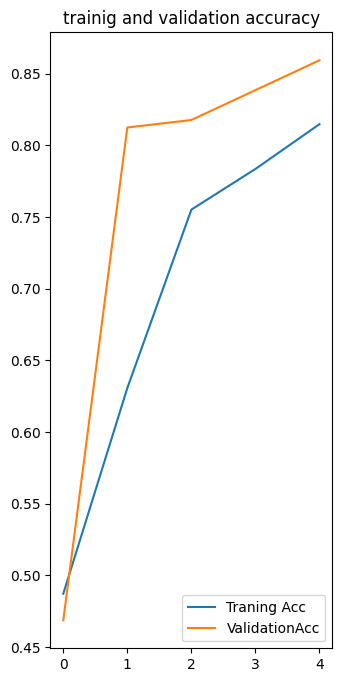

In [70]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Traning Acc')
plt.plot(range(EPOCHS),val_acc,label='ValidationAcc')
plt.legend(loc='lower right')
plt.title('trainig and validation accuracy')

first image to predicrt
actual label  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
Potato___Late_blight


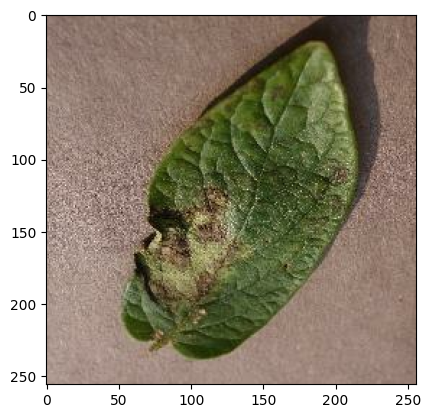

In [76]:
import numpy as np
for image_batch, label_batch in test.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label= label_batch[0].numpy()
    print("first image to predicrt")
    plt.imshow(first_image)
    print("actual label ", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [80]:
def predict(model, img):
    img_arr = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_arr = tf.expand_dims(img_arr, 0)

    predictions = model.predict(img_arr)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


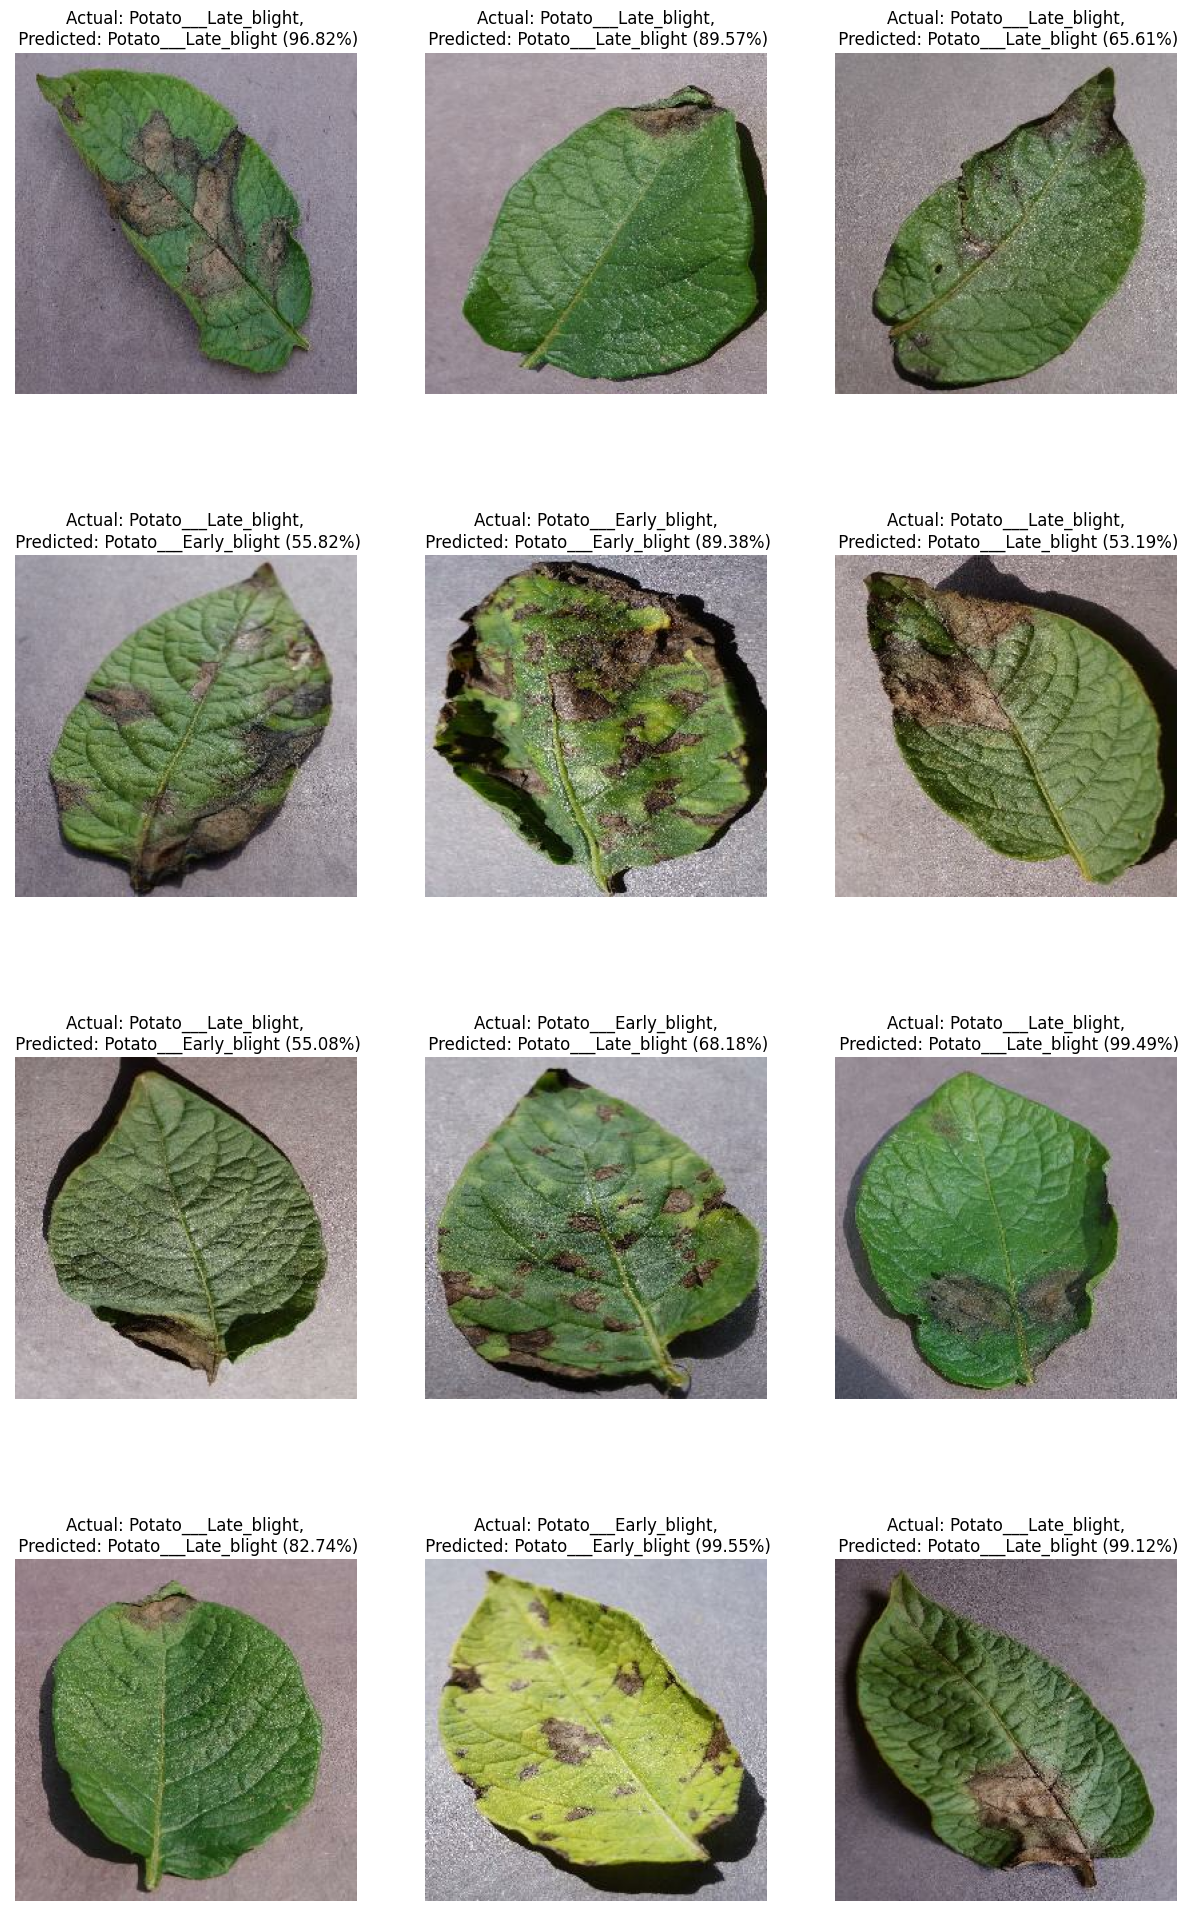

In [87]:
plt.figure(figsize=(15, 25))
for images, label in test.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[label[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class} ({confidence}%)")
        plt.axis("off")

In [94]:
model_version = 1
model.save(f"model_v{model_version}.keras")


### for loading models in kera formate

In [95]:
loaded_model = tf.keras.models.load_model(f"model_v{model_version}.keras")
